# MLP weights initialization

This notebook creates and saves locally the weights of a simple MLP for the IRIS dataset. This dataset contains: 
- Four features, representing flower characteristics. These are
    - *sepal_length,sepal_width,petal_length,petal_width*
- A label (*species*), that can get one of the following values
    - *setosa. versicolor,virginica*.

The MLP is constructed in order to be as simple as possible, since later on it will be implemented and synthetised in VITIS. It has 2 hidden layers with the ReLu activation function, and an output one with 3 neurons (following the number of available classes of the dataset).

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess the dataset
data = np.loadtxt('../datasets/iris_dataset/iris_dataset.txt')
X = data[:, :4]
y = data[:, 4]

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs.data, 1) 
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')

Epoch [10/100], Loss: 0.9397, Accuracy: 70.00%
Epoch [20/100], Loss: 0.6348, Accuracy: 73.33%
Epoch [30/100], Loss: 0.4041, Accuracy: 93.33%
Epoch [40/100], Loss: 0.2700, Accuracy: 96.67%
Epoch [50/100], Loss: 0.1638, Accuracy: 100.00%
Epoch [60/100], Loss: 0.1048, Accuracy: 100.00%
Epoch [70/100], Loss: 0.0804, Accuracy: 100.00%
Epoch [80/100], Loss: 0.0703, Accuracy: 100.00%
Epoch [90/100], Loss: 0.0655, Accuracy: 100.00%
Epoch [100/100], Loss: 0.0629, Accuracy: 100.00%


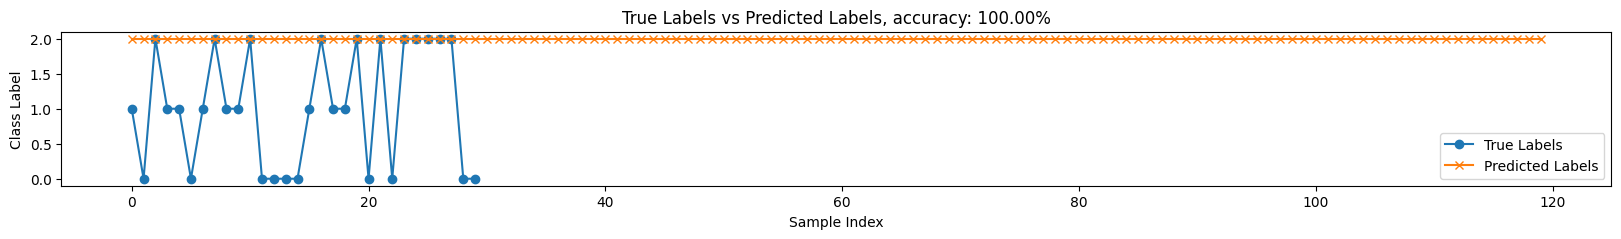

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the true labels and predicted values
plt.figure(figsize=(20, 2))
plt.plot(y_test.numpy(), label='True Labels', marker='o')
plt.plot(predicted.numpy(), label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('True Labels vs Predicted Labels, accuracy: {:.2f}%'.format(accuracy * 100))
plt.legend()
plt.show()

First, let's extract the weights from the model

In [51]:
weights = {}
for name, param in model.named_parameters():
    weights[name] = param.detach().numpy()

# Print their shapes to verify the network architecture
for name, weight in weights.items():
    print(f"{name}: {weight.shape}")

fc1.weight: (10, 4)
fc1.bias: (10,)
fc2.weight: (10, 10)
fc2.bias: (10,)
fc3.weight: (3, 10)
fc3.bias: (3,)


Let's save the weights in a txt file

In [ ]:
import numpy as np

with open('weights.txt', 'w') as f:
    for name, weight in weights.items():
        f.write(f"{name}\n")
        np.savetxt(f, weight, fmt='%f')